In [19]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
plt.rcParams["figure.figsize"] = (10,8)

In [3]:
df = pd.read_csv('advertising.csv')

In [4]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Vẽ biểu đồ để trực quan hóa mối quan hệ giữa lượng sản phẩm được bán ra với lần lượt chi phí quảng  cáo trên TV, Radio và báo chí bằng hình ảnh, dùng 1 biểu đồ cho mỗi loại hình quảng cáo.

Text(0.5, 1.0, 'Biểu đồ trực quan mối quan hệ Newspaper và chi phí quảng cáo bằng TV')

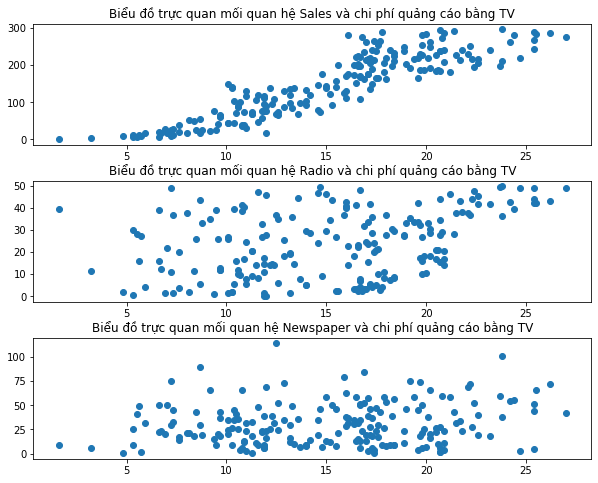

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
plt.subplots_adjust(wspace=0.5, hspace=0.3)
ax1.scatter(df.Sales, df.TV)
ax2.scatter(df.Sales, df.Radio)
ax3.scatter(df.Sales, df.Newspaper)
ax1.set_title('Biểu đồ trực quan mối quan hệ Sales và chi phí quảng cáo bằng TV')
ax2.set_title('Biểu đồ trực quan mối quan hệ Radio và chi phí quảng cáo bằng TV')
ax3.set_title('Biểu đồ trực quan mối quan hệ Newspaper và chi phí quảng cáo bằng TV')

Chia ngẫu nhiên dữ liệu quan sát được thành hai phần dữ liệu huấn luyện và dữ liệu kiểm tra.

In [6]:
y = df['Sales'].values
X = df.drop(columns=['Sales']).values

In [7]:
X.shape , y.shape

((200, 3), (200,))

In [8]:
y = y.reshape(-1,1)

In [9]:
y.shape

(200, 1)

In [10]:
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=42) 

Xây dựng mô hình hồi quy tuyến tính đa biến với biến dự báo là lượng hàng bán ra, các biến đầu vào là chi phí cho cả 3 loại hình quảng cáo. Đánh giá mô hình.

In [11]:
## Huấn luyện mô hình 
LR = LinearRegression()

In [12]:
LR.fit(X_train,y_train)
print("Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:")
print("Intercept (hệ số chặn beta0) =", LR.intercept_)
print("Coefficients(hệ số tương quan):", LR.coef_)

Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:
Intercept (hệ số chặn beta0) = [4.7437667]
Coefficients(hệ số tương quan): [[0.05358869 0.10270677 0.00793167]]


In [13]:
### Sử dụng mô hình 
y_prediction = LR.predict(X_test)

In [14]:
y_prediction

array([[17.15991908],
       [20.53369503],
       [23.68914396],
       [ 9.5191455 ],
       [21.60736836],
       [12.78101318],
       [21.08636345],
       [ 8.76054246],
       [17.11499951],
       [16.68789636],
       [ 8.97584663],
       [ 8.57645026],
       [18.33212325],
       [ 8.17863567],
       [12.64605571],
       [14.94486946],
       [ 8.34939536],
       [17.83858948],
       [11.12172174],
       [20.37740648],
       [20.9483297 ],
       [13.04035779],
       [11.01360656],
       [22.51142595],
       [ 9.40369784],
       [ 7.98591291],
       [20.86943368],
       [13.77882255],
       [10.83407064],
       [ 8.00419229],
       [15.88597618],
       [10.7027424 ],
       [20.9521718 ],
       [10.84679243],
       [21.50720813],
       [21.07347295],
       [12.22673775],
       [22.85273767],
       [12.57698182],
       [ 6.54597206],
       [11.93411853],
       [15.23490068],
       [10.07411153],
       [ 9.52159696],
       [17.11786382],
       [ 7

In [15]:
score= r2_score(y_test,y_prediction)

In [16]:
score

0.9091484341849798

In [17]:
## mô hình giải thích được hơn 90% 
# mean_squared_error = mean_squared_error(y_test,y_prediction)
print('Mean_sqrd_error is : ',mean_squared_error(y_test,y_prediction))

Mean_sqrd_error is :  2.541624036229151


In [23]:
mape = mean_absolute_error(y_test, y_prediction)
print('chỉ số MAPE là : ', mape)

chỉ số MAPE là :  1.1594875061090588
